![Pipline ML](../img/pipline-ml-approach-crisp-dm.png)<br>

<div class="text-center">Typical Machine Learning Pipeline with CRISP-DM Approach</div>
<div class="text-center">(Sarkar, et. al., 2018)</div>

# 1. Business Understanding

* Divisi Human Capital (HC) PT PTMN akan mengadakan kursus peningkatan kompetensi bagi pekerja
* Pekerja akan dikelompokkan berdasarkan nilai realisasi KPI dan lama bekerja
* Pekerja PT PTMN dibagi menjadi tiga kelompok, yaitu kelompok performa baik, kelompok performa sedang, dan kelompok performa buruk
* Pekerja yang **wajib** mengikuti kursus peningkatan kompetensi adalah pekerja yang masuk dalam **kelompok performa buruk**

# 2. Data Understanding
Divisi HC PT PTMN mengambil data penilaian KPI perusahaan dan diberi nama penilaian_pekerja.csv, data tersebut berisi atribut sebagai berikut:
   * nopek, adalah nomor  pekerja, sebagai identity
   * lama_bekerja, adalah lama waktu pekerja bekerja di PT PTMN (dalam satuan tahun)
   * realisasi_kpi, adalah nilai realisasi KPI setiap pekerja (dalam satuan persen)

# 3. Data Preparation

In [1]:
# import library-libary yang digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset penilaian_pekerja.csv
nilai = pd.read_csv('../datasets/penilaian_pekerja.csv')

In [3]:
# menampilkan lima data teratas
nilai.head()

,nopek,lama_bekerja,realisasi_kpi
0,PTMN-101,15,95
1,PTMN-102,15,100
2,PTMN-103,14,98
3,PTMN-104,14,100
4,PTMN-105,14,92


In [4]:
# cek dimensi data
nilai.shape

(50, 3)

In [5]:
# menampilkan nama-nama atribut
nilai.columns

Index(['nopek', 'lama_bekerja', 'realisasi_kpi'], dtype='object')

In [6]:
# menampilkan tipe data masing-masing atribut
nilai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
nopek            50 non-null object
lama_bekerja     50 non-null int64
realisasi_kpi    50 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


### Cek Missing Value

In [7]:
# cek apakah terdapat missing value
nilai.isnull().sum()

nopek            0
lama_bekerja     0
realisasi_kpi    0
dtype: int64

Data penilaian_pekerja.csv tidak terdapat missing value

### Atribute/Feature Selection

Pada bagian data understanding, telah dijelaskan bahwa nopek sebagai identity, sehingga tidak digunakan dalam pemodelan.

In [8]:
#filter hanya atribut lama_bekerja dan realisasi_kpi yang digunakan dalam pemodelan
nilai_fs = nilai[['lama_bekerja', 'realisasi_kpi']]

In [9]:
# cek lima data teratas setelah dilakukan feature selection
nilai_fs.head()

,lama_bekerja,realisasi_kpi
0,15,95
1,15,100
2,14,98
3,14,100
4,14,92


In [10]:
# cek dimensi data setelah dilakukan feature selection
nilai_fs.shape

(50, 2)

In [11]:
# menampilkan kolom yang digunakan setelah feature selection
nilai_fs.columns

Index(['lama_bekerja', 'realisasi_kpi'], dtype='object')

### Exploratory Data Analysis

In [12]:
# statistic descriptive
nilai_fs.describe()

,lama_bekerja,realisasi_kpi
count,50.000000,50.000000
mean,7.580000,67.760000
std,4.243074,26.418577
min,1.000000,10.000000
25%,4.000000,50.000000
50%,7.500000,71.000000
75%,11.000000,90.000000
max,15.000000,100.000000


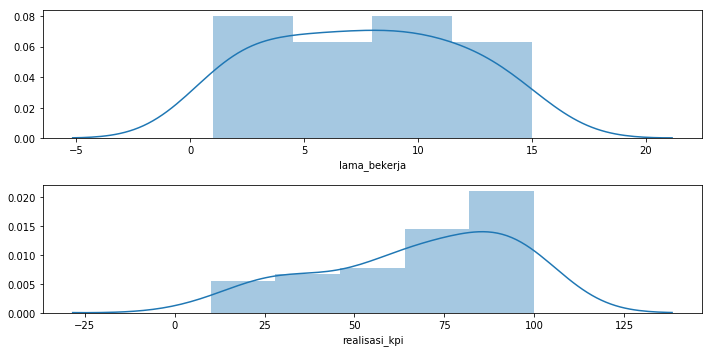

In [13]:
# menampilkan distribusi kedua atribut
fig = plt.figure(figsize=(10,5))

fig.add_subplot(2,1,1)
sns.distplot(nilai['lama_bekerja'])

fig.add_subplot(2,1,2)
sns.distplot(nilai['realisasi_kpi'])

fig.tight_layout()

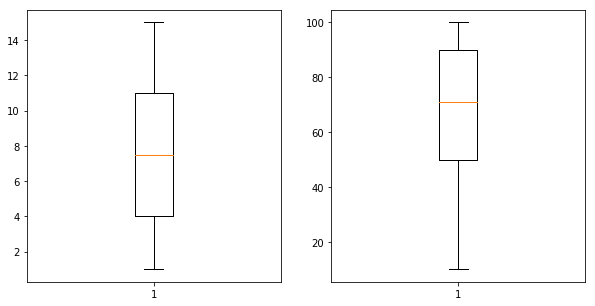

In [14]:
# melihat distribusi kedua atribut dalam bentuk box plot
fig = plt.figure(figsize=(10,5))

fig.add_subplot(1,2,1)
plt.boxplot(nilai['lama_bekerja'])

fig.add_subplot(1,2,2)
plt.boxplot(nilai['realisasi_kpi'])

plt.show()

In [15]:
# hubungan korelasi antara lama_bekerja dan realisasi_kpi
nilai_fs.corr()

,lama_bekerja,realisasi_kpi
lama_bekerja,1.000000,0.894816
realisasi_kpi,0.894816,1.000000


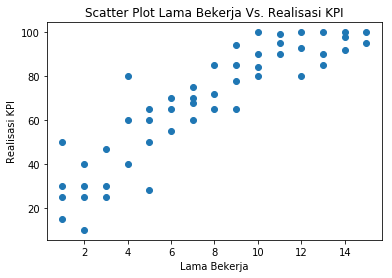

In [16]:
# Bivariate analysis antara atribut lama_bekerja dan realisasi_kpi dengan scatter plot
plt.scatter(nilai_fs['lama_bekerja'], nilai_fs['realisasi_kpi'])
plt.xlabel('Lama Bekerja')
plt.ylabel('Realisasi KPI')
plt.title('Scatter Plot Lama Bekerja Vs. Realisasi KPI')
plt.show()

* Scatter plot menunjukkan korelasi positif
* Semakin lama bekerja, nilai realisasi KPI semakin tinggi

# 4. Modeling

   * Dalam tahapan modeling, algoritme machine learning yang digunakan adalah **algoritme K-Means**
   * Nilai K yang digunakan adalah tiga, karena performa pekerja akan dibagi menjadi tiga kelompok

In [17]:
kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(nilai_fs)
kmeans.cluster_centers_

array([[11.26086957, 91.        ],
       [ 2.36363636, 27.09090909],
       [ 5.875     , 62.3125    ]])

# 5. Evaluation

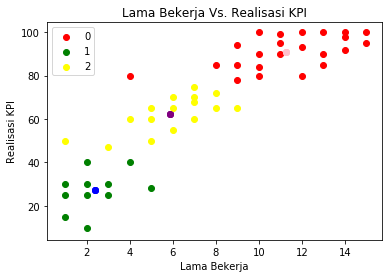

In [18]:
x = nilai['lama_bekerja']
y = nilai['realisasi_kpi']

group = kmeans.labels_

colors = ['red', 'green', 'yellow']
fig, ax = plt.subplots()

for g in set(kmeans.labels_):
    xi = [x[j] for j in range(len(x)) if group[j]==g]
    yi = [y[j] for j in range(len(y)) if group[j]==g]
    ax.scatter(xi, yi, c=colors[g], label=g)
    ax.scatter(2.36363636,  27.09090909, c='blue')
    ax.scatter(5.875,  62.3125, c='purple')
    ax.scatter(11.26086957,  91.000, c='pink')
    plt.xlabel('Lama Bekerja')
    plt.ylabel('Realisasi KPI')
    plt.title('Lama Bekerja Vs. Realisasi KPI')

ax.legend()
plt.show()

* Pekerja dengan kelompok performa buruk masuk ke dalam Cluster 0 (warna merah)
* Pekerja dengan kelompok performa sedang masuk ke dalam Cluster 2 (warna kuning)
* Pekerja dengan kelompok performa baik masuk ke dalam Cluster 1 (warna hijau)

##### Dalam tahapan evaluasi, akan dihitung berapa jumlah kelompok (nilai K) optimal dari algoritme K-Means saat diterapkan pada dataset penilaian_pekerja.csv

In [19]:
# manceri nilai K optimal
inertia = []
silhouette = []

K = range(3,10)
for k in K:
    kmeans = KMeans(n_clusters = k)
    kmeans = kmeans.fit(nilai_fs)
    kmeans.labels_
    
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(nilai_fs, kmeans.labels_))

Text(0, 0.5, 'Nilai Silhoutte')

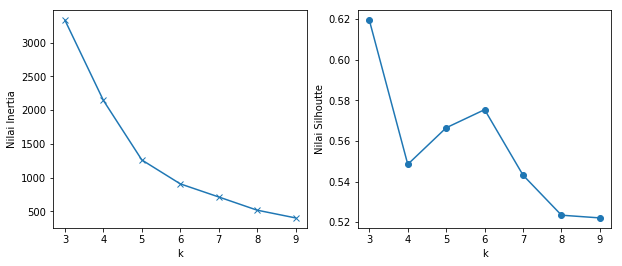

In [20]:
# visualisasi plotting nilai K
fig = plt.figure(figsize=(10,4))

fig.add_subplot(1,2,1)
plt.plot(K, inertia, marker='x')
plt.xlabel('k')
plt.ylabel('Nilai Inertia')

fig.add_subplot(1,2,2)           
plt.plot(K, silhouette, marker='o')
plt.xlabel('k')
plt.ylabel('Nilai Silhoutte')

Dari grafik di atas terlihat bahwa nilai K optimal adalah tiga, sehingga divisi HC PT PTMN sudah tepat membagi kelompok menjadi tiga kelompok

# 6. Deployment

#### Menampilkan data semua pekerja dengan menambahkan atribut nopek dan Cluster

In [21]:
nilai_fs['nopek'] = nilai['nopek']
nilai_fs['lama_bekerja'] = nilai_fs['lama_bekerja']
nilai_fs['realisasi_kpi'] = nilai_fs['realisasi_kpi']
nilai_fs['Cluster']=kmeans.labels_
nilai_fs

,lama_bekerja,realisasi_kpi,nopek,Cluster
0,15,95,PTMN-101,8
1,15,100,PTMN-102,0
2,14,98,PTMN-103,0
3,14,100,PTMN-104,0
4,14,92,PTMN-105,8
5,13,100,PTMN-106,0
6,13,85,PTMN-107,4
7,13,90,PTMN-108,8
8,12,80,PTMN-109,4
9,12,100,PTMN-110,0


#### Menampilkan pekerja yang mengikuti kursus peningkatan kompetensi (berada di Cluster 0)

In [22]:
pekerja_performa_buruk = nilai_fs[nilai_fs.Cluster==0]
pekerja_performa_buruk

,lama_bekerja,realisasi_kpi,nopek,Cluster
1,15,100,PTMN-102,0
2,14,98,PTMN-103,0
3,14,100,PTMN-104,0
5,13,100,PTMN-106,0
9,12,100,PTMN-110,0
13,11,99,PTMN-114,0
15,10,100,PTMN-116,0


In [23]:
# jumlah data pekerja dengan performa buruk dihitunng berdasarkan count nopek
pekerja_performa_buruk['nopek'].count()

7